In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import os

## Define Constants

In [143]:
image_width = 128
image_height = 128
image_size = (image_width, image_height)
image_channels = 3
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = "accuracy"
batch_size = 15
epochs = 50

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## [Data Link: https://drive.google.com/drive/folders/1PgZsfVXQJJK0nCdhJFkQ99en2HvdFqW-?usp=sharing](https://drive.google.com/drive/folders/1PgZsfVXQJJK0nCdhJFkQ99en2HvdFqW-?usp=sharing)

In [145]:
len(os.listdir('/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/training')),len(os.listdir('/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/testing'))

(1000, 200)

In [146]:
filenames = os.listdir("/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/training")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(1) if category == "cat" else categories.append(0)
df = pd.DataFrame({
    "filenames":filenames,
    "category":categories})

In [147]:
df.head()

,filenames,category
0,cat.4075.jpg,1
1,cat.4069.jpg,1
2,cat.4072.jpg,1
3,cat.4077.jpg,1
4,cat.4067.jpg,1


In [148]:
df.tail()

,filenames,category
995,dog.4483.jpg,0
996,dog.4476.jpg,0
997,dog.4478.jpg,0
998,dog.4475.jpg,0
999,dog.4477.jpg,0


In [149]:
df["category"].value_counts()

,count
category,
1,500
0,500


In [150]:
df[df["category"]==1]

,filenames,category
0,cat.4075.jpg,1
1,cat.4069.jpg,1
2,cat.4072.jpg,1
3,cat.4077.jpg,1
4,cat.4067.jpg,1
...,...,...
495,cat.4472.jpg,1
496,cat.4471.jpg,1
497,cat.4469.jpg,1
498,cat.4474.jpg,1


In [151]:
df[df["category"]==0]

,filenames,category
500,dog.4028.jpg,0
501,dog.4026.jpg,0
502,dog.4024.jpg,0
503,dog.4031.jpg,0
504,dog.4030.jpg,0
...,...,...
995,dog.4483.jpg,0
996,dog.4476.jpg,0
997,dog.4478.jpg,0
998,dog.4475.jpg,0


In [152]:
df["category"].unique()

array([1, 0])

## See Total In count

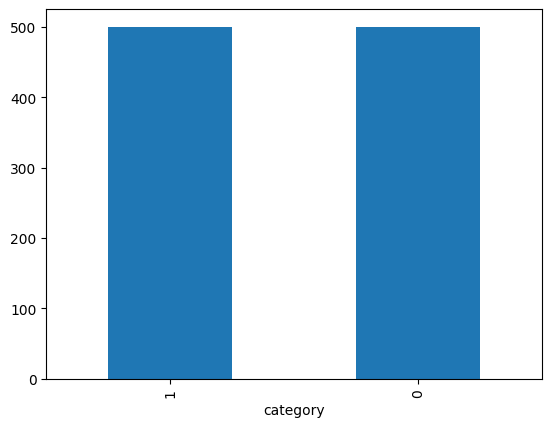

In [153]:
df["category"].value_counts().plot.bar();

## See sample image

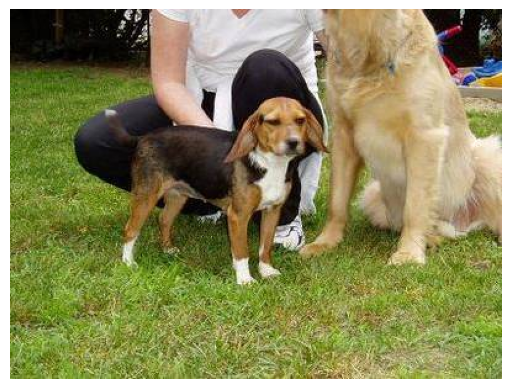

In [154]:
sample = random.choice(filenames)
img = load_img('/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/training/' + sample)
plt.imshow(img)
plt.axis("off")
plt.show()

## Build Model



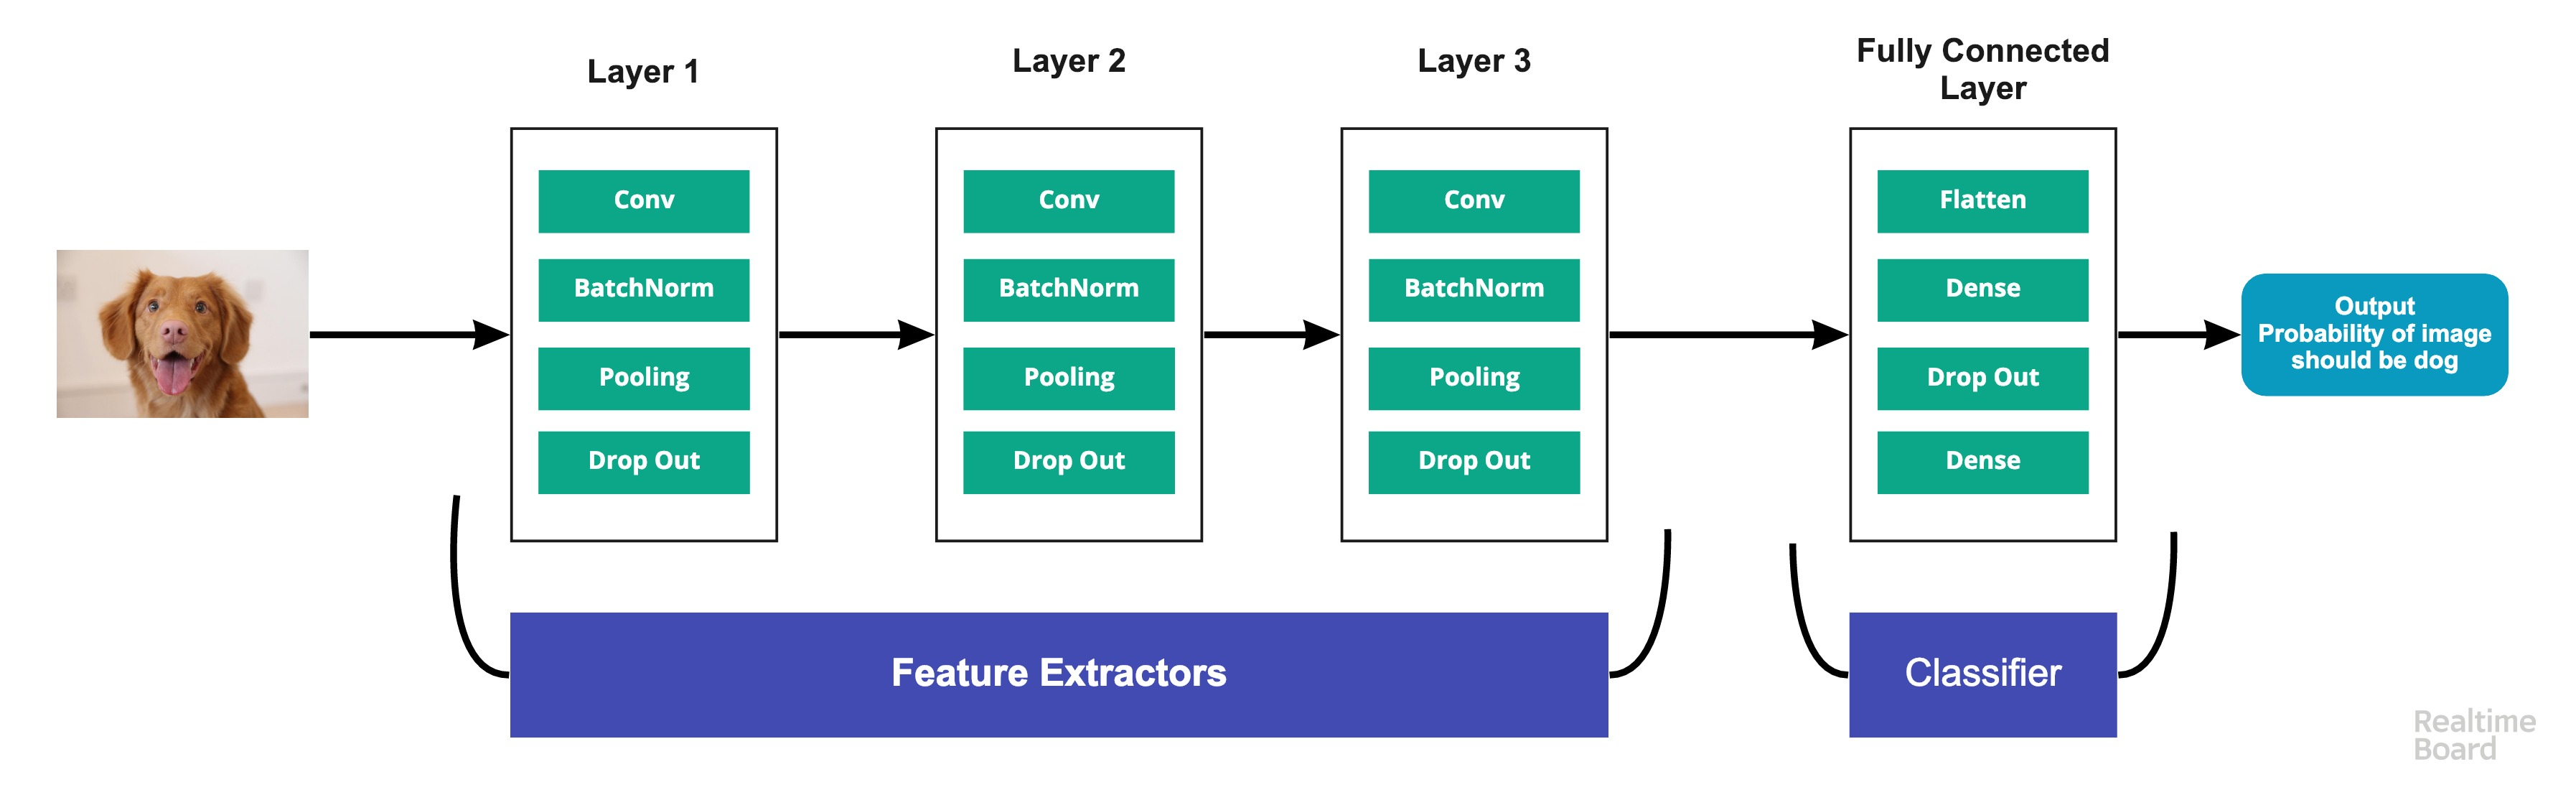

In [155]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten, Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = "relu", input_shape = (image_width, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation="tanh"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

In [157]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,283,106 (12.52 MB)

 Trainable params: 3,282,850 (12.52 MB)

 Non-trainable params: 256 (1.00 KB)

## Callbacks

In [158]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [159]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [160]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [161]:
callbacks = [
    early_stopping,
    learning_rate_reduction
]

## Prepare Data

In [162]:
def replace(categorry):
  return "cat" if categorry == 1 else "dog"
df["category"] = df["category"].apply(replace)

In [163]:
df

,filenames,category
0,cat.4075.jpg,cat
1,cat.4069.jpg,cat
2,cat.4072.jpg,cat
3,cat.4077.jpg,cat
4,cat.4067.jpg,cat
...,...,...
995,dog.4483.jpg,dog
996,dog.4476.jpg,dog
997,dog.4478.jpg,dog
998,dog.4475.jpg,dog


In [164]:
train_df, validate_df = train_test_split(df, test_size=.2, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [165]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
total_train, total_validate

(800, 200)

## Traning Generator

In [166]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [167]:
train_df

,filenames,category
0,cat.4057.jpg,cat
1,dog.4062.jpg,dog
2,dog.4226.jpg,dog
3,dog.4035.jpg,dog
4,dog.4326.jpg,dog
...,...,...
795,cat.4013.jpg,cat
796,cat.4280.jpg,cat
797,dog.4310.jpg,dog
798,cat.4410.jpg,cat


In [168]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    '/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/training',
    x_col='filenames',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 800 validated image filenames belonging to 2 classes.


## Validation Generator

In [169]:
validate_datagen = ImageDataGenerator(rescale=1./255)
validate_generator = validate_datagen.flow_from_dataframe(
    validate_df,
    '/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/training',
    x_col='filenames',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 200 validated image filenames belonging to 2 classes.


## See how our generator work

In [170]:
sample = train_df.sample(n=1).reset_index(drop=True)
sample_generator = train_datagen.flow_from_dataframe(sample,
                                                       '/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/training',
                                                        x_col='filenames',
                                                        y_col='category',
                                                        target_size=image_size,
                                                        class_mode='categorical',
                                                        batch_size=batch_size
                                                       )

Found 1 validated image filenames belonging to 1 classes.


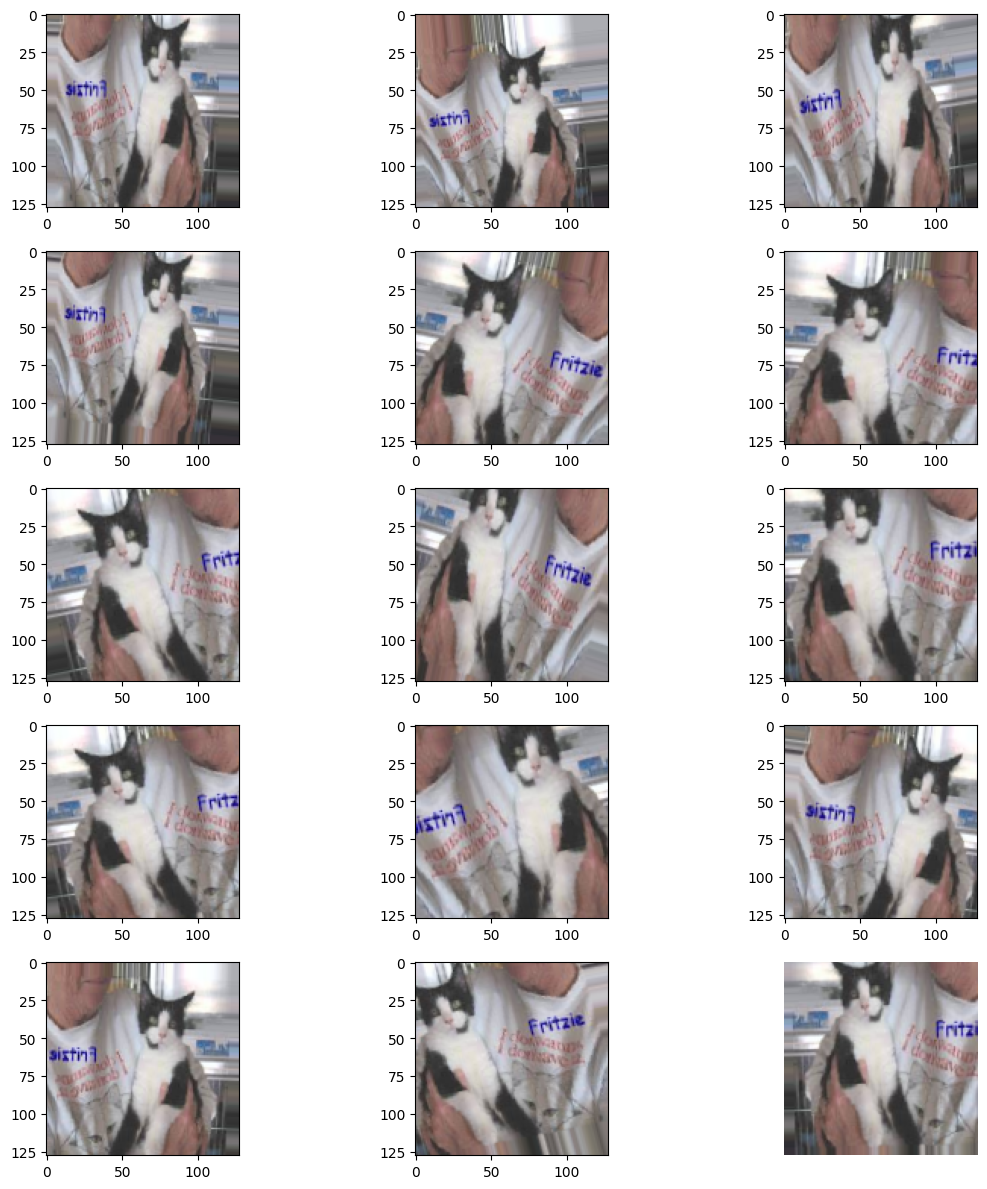

In [171]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
  plt.subplot(5, 3, i+1)
  for x_batch, y_batch in sample_generator:
    image = x_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.axis('off')
plt.show()

## Fit Model

In [172]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validate_generator,
    steps_per_epoch = total_train//batch_size,
    validation_steps = total_validate//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 228ms/step - accuracy: 0.5018 - loss: 0.8265 - val_accuracy: 0.4872 - val_loss: 0.8248 - learning_rate: 0.0010
Epoch 2/50
 1/53 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5333 - loss: 0.8147

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5333 - loss: 0.8147 - val_accuracy: 0.4821 - val_loss: 0.8370 - learning_rate: 0.0010
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5984 - loss: 0.6662
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.5981 - loss: 0.6663 - val_accuracy: 0.4872 - val_loss: 0.9599 - learning_rate: 0.0010
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7333 - loss: 0.5643 - val_accuracy: 0.4769 - val_loss: 0.9624 - learning_rate: 5.0000e-04
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6409 - loss: 0.6243
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.6407 - loss: 0.6244 - val_accuracy: 0.4821 - val_loss: 0.8180 - learning_rate: 5.0000e-04
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5333 - loss: 0.6399 - val_ac

## Save Model

In [173]:
model.save_weights("model.weights.h5")

## Virtualize Training

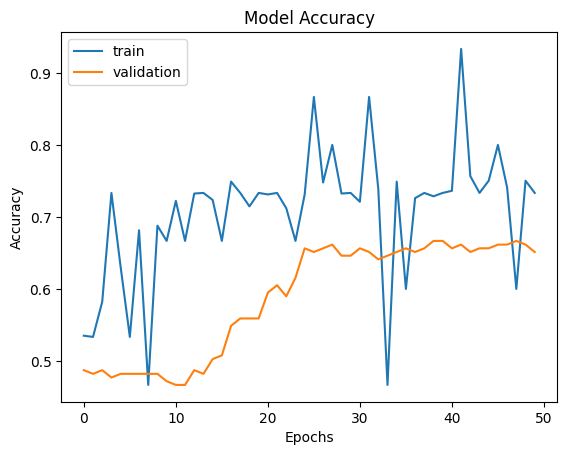

In [174]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

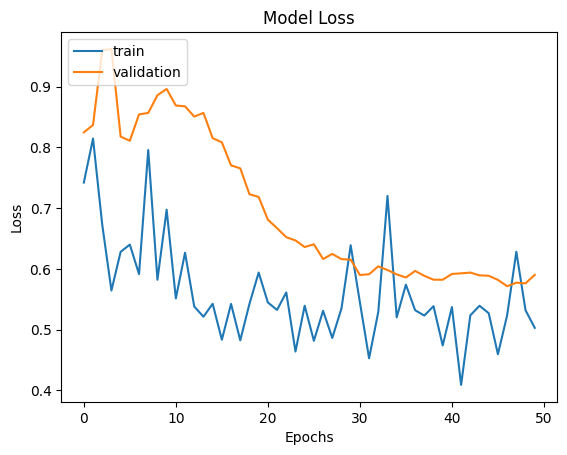

In [175]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [176]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
# ax1.plot(history.history['loss'], color='b', label="Training loss")
# ax1.plot(history.history['val_loss'], color='r', label="validation loss")
# ax1.set_xticks(np.arange(1, epochs, 1))
# ax1.set_yticks(np.arange(0, 1, 0.1))

# ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
# ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
# ax2.set_xticks(np.arange(1, epochs, 1))

# legend = plt.legend(loc='best', shadow=True)
# plt.tight_layout()
# plt.show()

## Prepare Testing Data

In [177]:
test_filenames = os.listdir("/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/testing")
test_df = pd.DataFrame({
    'filenames':test_filenames
})
test_df

,filenames
0,cat.4502.jpg
1,cat.4512.jpg
2,cat.4495.jpg
3,cat.4508.jpg
4,cat.4506.jpg
...,...
195,dog.4993.jpg
196,dog.4916.jpg
197,dog.4932.jpg
198,dog.4955.jpg


In [178]:
total_test = test_df.shape[0]
total_test

200

## Create Testing Generato

In [179]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    '/content/drive/MyDrive/Hesham AsemCourse/Day 08/02 Image Classification/testing',
    x_col='filenames',
    y_col=None,
    class_mode=None,
    shuffle=False,
    target_size=image_size,
    batch_size=batch_size
)

Found 200 validated image filenames.


## Predict

In [182]:
prediction = model.predict(test_generator, steps=np.ceil(total_test/batch_size))

In [183]:
test_df["category"] = np.argmax(prediction, axis=-1)
test_df

,filenames,category
0,cat.4502.jpg,1
1,cat.4512.jpg,1
2,cat.4495.jpg,0
3,cat.4508.jpg,0
4,cat.4506.jpg,0
...,...,...
195,dog.4993.jpg,1
196,dog.4916.jpg,1
197,dog.4932.jpg,0
198,dog.4955.jpg,1


In [184]:
test_df['category'].value_counts()

,count
category,
0,112
1,88


In [185]:
test_df["category"] = test_df["category"].apply(replace)
test_df

,filenames,category
0,cat.4502.jpg,cat
1,cat.4512.jpg,cat
2,cat.4495.jpg,dog
3,cat.4508.jpg,dog
4,cat.4506.jpg,dog
...,...,...
195,dog.4993.jpg,cat
196,dog.4916.jpg,cat
197,dog.4932.jpg,dog
198,dog.4955.jpg,cat


In [186]:
test_df["actual_label"] = test_df["filenames"].apply(lambda x:x.split('.')[0])
test_df

,filenames,category,actual_label
0,cat.4502.jpg,cat,cat
1,cat.4512.jpg,cat,cat
2,cat.4495.jpg,dog,cat
3,cat.4508.jpg,dog,cat
4,cat.4506.jpg,dog,cat
...,...,...,...
195,dog.4993.jpg,cat,dog
196,dog.4916.jpg,cat,dog
197,dog.4932.jpg,dog,dog
198,dog.4955.jpg,cat,dog


In [188]:
test_df["actual_label"].value_counts()

,count
actual_label,
cat,100
dog,100


In [189]:
test_df["category"].value_counts()

,count
category,
dog,112
cat,88


In [192]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_df["actual_label"], test_df["category"] )
cm

array([[25, 75],
       [63, 37]])

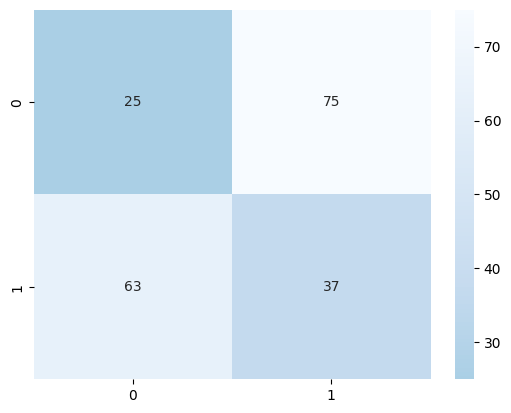

In [197]:
# drawing confusion matrix
sns.heatmap(cm, center = True,cmap='Blues_r', annot=True)
plt.show()